In [31]:
import math
import numpy as np
import pandas as pd
from numpy import random
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [32]:
def z2x(z,typ,dist_param,corrmat):
    #z=np.array([[0.117786329536724,0.906056749773236,2.28732658561840,2.11617887466017,1.92616854758541,-1.17895895833063,1.86522403656920,-0.846142058945248]])
    nvar = len(typ[0])
    z=np.array([z])
    L = np.linalg.cholesky(corrmat)
    zcorr = np.matmul(z,L)
    u = norm.cdf(zcorr)
    x = np.array([[0.0]*nvar])                     
    for ivar in range(nvar):
        if   typ[0][ivar]==1:
            x[:,ivar]=dist_param[ivar,0] + dist_param[ivar,1]*zcorr[:,ivar]
        elif typ[0][ivar]==2:
            x[:,ivar]=math.exp(dist_param[ivar,0] + dist_param[ivar,1]*zcorr[:,ivar])
        elif typ[0][ivar]==3:x[:,ivar]=dist_param[ivar,1] + (dist_param[ivar,1] - dist_param[ivar,0])*u[:,ivar]
        elif typ[0][ivar]==4:x[:,ivar]=dist_param[ivar,0] - dist_param[ivar,1]*math.log(-math.log(u[:,ivar]))
        elif typ[0][ivar]==5:
            theta=1/(dist_param[ivar,1])
            x[:,ivar]= dist_param[ivar,0]*((-math.log(-(u[:,ivar]-1)))**theta)
        
    return x

In [33]:
def Fun(D,zrand,jtau,ndefect,mu,sd,typ,dist_param,corrmat):
    xrand = z2x(zrand,typ,dist_param,corrmat)
    wt= xrand[0][0]
    sigmau= xrand[0][1]
    P= xrand[0][2]
    d01=xrand[:,3:4+ndefect-1][0][0]
    l01=xrand[:,3+ndefect:4+ndefect+ndefect][0][0]
    gd1= xrand[:,3+ndefect+ndefect:3+ndefect+ndefect+ndefect][0][0]
    gl1= xrand[:,3+ndefect+ndefect+ndefect: 4+ndefect+ndefect+ndefect+ndefect-1][0][0]
    xi= xrand[:,-1][0]
             
              
    gll1= np.zeros([1,ndefect])[0][0]
    gb1= gll1
    gl0= gll1
    gb0= gll1
              
    for idefect in range(ndefect):
        d1= d01+gd1*jtau
        l1= l01+gl1*jtau       
        gll1= 0.8*wt - d1
        gb1=xi*(2*wt*sigmau/D)*(1-(d1/wt)*(1-math.exp((-0.157*l1/(math.sqrt(abs(D*(wt-d1))/2))))))-P
    
              
        if jtau>1:
            d0= d01+gd1*(jtau - 1)
            l0= l01+gl1*(jtau - 1)
            gl0=0.8*wt - d0

            gb0=xi*(2*wt*sigmau/D)*(1-(d0/wt)*(1-math.exp((-0.157*l0/(math.sqrt(abs(D*(wt-d0))/2))))))-P
    
    if jtau==1:
        gl = gll1                                       
        gb = gb1                                            
    else:
        gl= gll1*gl0                                        
        gb= gb1*gb0                                          
        
    return [gl,gb]    


In [34]:
pf1=[]


#_________________________________________________________________________________________________________________________#





for jtau in range(1,11):
    #Algorithm Parameters Requried 
    N=300;#print("\nN:",N)
    p0=0.05;#print("\np0:",p0)
    nt=round(N*p0);#print("\nnt:",nt) #15 
    ns=math.ceil(1/p0-1);#print("\nns:",ns) #19 
    ndefect=1;#print("\nndefect:",ndefect)
    zrand = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\zrand')['zrand'];#print("\nzrand",zrand,zrand.shape)
    #zrand=np.random.randn(300,(4+4*ndefect))
    z=zrand;#print("\nz:",z,z.shape)
    xrand = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\xrand')['xrand'];#print("\nxrand",xrand,xrand.shape)
    #xrand=np.random.randn(300,(4+4*ndefect));#print("xrand",xrand)
    n=len(xrand[0]);#print("\nn:",n) 
    

    
    #Paras Variable 
    NumSam=300;#print("\nNumSam",NumSam) 
    CondPro=0.05;#print("\nCondPro",CondPro)  
    MaxTry=10;#print("\nMaxTry",MaxTry) 
    
#_________________________________________________________________________________________________________________________#

#     #Param Variable (ex-1) 
#     D=914;#print("\nD:",D)   
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,50,0.400000000000000,5,1]])
#     #print("\nmu",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,10,0.200000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("\nsd",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     #print("\ntyp",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,50,0.451625357017455,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,10,2.10134901124680,0.472380727077439,0.0997513451195927]])) 
#     #print("\ndist_param",dist_param,dist_param.shape)
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
#     #print("\ncorrmat",corrmat,corrmat.shape)
    
    
    
#     #Param Variable (ex-2)
#     D=610
#     mu= np.array([[8.62000000000000,563.530000000000,7,1.72400000000000,50,0.300000000000000,5,1]])
#     #print("\nmu",mu,mu.shape)
#     sd= np.array([[0.129300000000000,16.9059000000000,0.210000000000000,0.344800000000000,10,0.150000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("\nsd",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     #print("\ntyp",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [8.62000000000000,6.33377077312806,6.90549139132886,1.72400000000000,50,0.338719019741086,1.49786613677700,-0.00497516542658391],[0.129300000000000,0.0299932532886313,0.163736328259072,0.344800000000000,10,2.10134882811100,0.472380727077439,0.0997513451195927]])) 
#     #print("\ndist_param",dist_param,dist_param.shape)
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
#     #print("\ncorrmat",corrmat,corrmat.shape)
    
    
    
#     #Param Variable (ex-3)
#     D=508
#     mu= np.array([[7.38000000000000,563.530000000000,6,1.47600000000000,50,0.200000000000000,5,1]])
#     #print("\nmu",mu,mu.shape)
#     sd= np.array([[0.110700000000000,16.9059000000000,0.180000000000000,0.295200000000000,10,0.100000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("\nsd",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     #print("\ntyp",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [7.38000000000000,6.33377077312806,5.91899262113903,1.47600000000000,50,0.225812690130582,1.49786613677700,-0.00497516542658391],[0.110700000000000,0.0299932532886313,0.140345424222062,0.295200000000000,10,2.10134739732313,0.472380727077439,0.0997513451195927]])) 
#     #print("\ndist_param",dist_param,dist_param.shape)
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
#     #print("\ncorrmat",corrmat,corrmat.shape)
    
    
    #Param Variable (ex-4)
    D=406
    mu= np.array([[7.07000000000000,495.950000000000,5,1.41400000000000,50,0.200000000000000,5,1]])
    #print("\nmu",mu,mu.shape)
    sd= np.array([[0.106050000000000,14.8785000000000,0.150000000000000,0.282800000000000,10,0.100000000000000,2.50000000000000,0.100000000000000]]) 
    #print("\nsd",sd,sd.shape)
    typ=np.array([[1,2,4,1,1,5,2,2]]) 
    #print("\ntyp",typ,typ.shape)
    dist_param= np.transpose(np.array([ [7.07000000000000,6.20602531757058,4.93249385094919,1.41400000000000,50,0.225812690130582,1.49786613677700,-0.00497516542658391],[0.106050000000000,0.0299932532886313,0.116954520185051,0.282800000000000,10,2.10134739732313,0.472380727077439,0.0997513451195927]])) 
    #print("\ndist_param",dist_param,dist_param.shape)
    corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
    #print("\ncorrmat",corrmat,corrmat.shape)
#__________________________________________________________________________________________________________________________#
    
    
    g=[]
    h=[]
    for i in range(N):
        [g1,h1] = Fun(D,z[i,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)
        g.append(g1)
        h.append(h1)
    g=[g]
    h=[h]
    g=np.array(g);#print("\ng",g,g.shape)
    #print("\n")
    h=np.array(h);#print("\nh",h,h.shape)
    
    
    
#__________________________________________________________________________________________________________________________#
    
    
    
    [gSort,index1]=[np.sort(g), np.argsort(g)];#print("gSort:",gSort,gSort.shape);print("\nindex1:",index1,index1.shape)
    [hSort,index2]=[np.sort(h), np.argsort(h)];#print("hSort:",hSort,hSort.shape);print("\nindex2:",index2,index2.shape)
    gRe = gSort
    hRe = hSort
    
    
    Z1 = z[index1,:][0];#print("\n Z1:",Z1,Z1.shape)
    Z2 = z[index2,:][0];#print("\n Z2:",Z2,Z2.shape)
    zRe1 = Z1
    zRe2 = Z2
    
    
    pfss1 = nt/N
    pfss2 = nt/N
    
    cdf =np.array([(N+1-np.array(range(N,0,-1)))/N]);#print("/n cdf",cdf,cdf.shape)
    
    
    sigma1 = np.array([np.std(Z1[:nt,:],axis=0,ddof=1)])#;print("\nsigma1",sigma1,sigma1.shape)
    sigma2 = np.array([np.std(Z2[:nt,:],axis=0,ddof=1)])#;print("\nsigma2",sigma2,sigma2.shape)
    
    
    
    
    
    
#__________________________________________________________________________________________________________________________#
    
    
    
    limit_state1=[] 
    stopFlag = 0                            
    iterr = 1
    while(stopFlag == 0):
        w = Z1[0:nt,:];#print("\nw",w,w.shape)
        g = np.array([gSort[0,0:nt]]);#print("\ng",g,g.shape)
        iterr = iterr+1
        lenh = nt+1
        u=np.array([np.random.rand(n)]);#print("\nu:",u,u.shape)
        #newrow=[0,0,0,0,0,0,0,0,0,0,0,0]
        newrow=[0,0,0,0,0,0,0,0]
        for i in range(nt):
            seed=np.array([w[i,:]]);#print("\nseed:",seed,seed.shape)
            seed_g=g[0,i];#print("\nseed_g",seed_g,seed_g.shape)
            
            
            for j in range(ns):         # A Markov chain
                
                
                for k in  range(n):     # Component by component
                    #Generate an candidate
                    u = seed[0,k]+(2*random.rand()-1)*sigma1[0,k]
                    #Calculate the acceptance probability
                    pdf2 = math.exp(-0.5*np.power(seed[0,k],2));#print("pdf2:",pdf2)
                    pdf1 = math.exp(-0.5*np.power(u,2));#print("pdf1:",pdf1)
                    alpha = pdf1/pdf2;#print(alpha)
                    #Accept u(k) with a probability of alpha
                    if  alpha > np.random.rand():
                        newrow[k]=u
                    else:
                        newrow[k]= seed[0,k]
                        
                        
                w = np.vstack([w, newrow])
                #print("\nw",w.shape)
                newrow=[0,0,0,0,0,0,0,0]
                #newrow=[0,0,0,0,0,0,0,0,0,0,0,0]
                [gTemp,theta] = Fun(D,w[lenh-1,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)    
                #Accept or Reject
                #print("\ngTemp:",gTemp)
                #print("\ngSort",gSort,gSort.shape)
                if gTemp <= gSort[0,nt]:
                    g=np.array([np.append(g,gTemp)])#print("g",g,g.shape)#g[lenh-1] = gTemp
                    seed = np.array([w[lenh-1,:]]);#print("\nseed:",seed,seed.shape)
                    seed_g = g[0,lenh-1]#print("\nseed_g:",seed_g.shape)
                else:
                    g=np.array([np.append(g,gTemp)])
                    w[lenh-1,:] = seed
                        
                lenh=lenh+1
                #terminate the simulation of a Markov chain
                if lenh>N:break
            if lenh>N:break
        #print("w:",w,w.shape)
        #print("\ng:",g,g.shape)
        
        #Sort samples and LSF values
        [gSort,index]=[np.sort(g), np.argsort(g)]#;print("\ngSort:",gSort,gSort.shape);print("\nindex:",index,index.shape)
        Z1 = w[index-1,:][0]#;print("\nZ1:",Z1,Z1.shape)
        #Record the calculated results
        gRe = np.array([np.append(gSort,gRe[0,nt:])])#;print("\ngRe:",gRe,gRe.shape)
        cdf = np.array([np.append(np.array([(N+1-np.array(range(N,0,-1)))/N*(nt/N)**(iterr-1)]),np.array([cdf[0,nt:]]))])#;print("\ncdf:",cdf,cdf.shape)
        zRe1=np.concatenate((Z1, zRe1[nt:,:]), axis=0)#;print("zRe1:",zRe1,zRe1.shape)
        
        if iterr >= MaxTry or  gSort[0,nt] <= 0:
            pfss1 = pfss1*(len([val for val in g[0] if val < 0])/N)
            stopFlag = 1
            limit_state1=limit_state1+[pfss1]
            break
        else:
            pfss1 = pfss1*(nt/N)
            limit_state1=limit_state1+[pfss1]

    
    limit_state1=np.array(limit_state1);#print("limit_state1:\n",limit_state1,limit_state1.shape);
    xaxis=np.array(range(1,len(limit_state1)+1))#;print(xaxis,xaxis.shape)
    if jtau==1:
        pf1.append(limit_state1[-1])
    else:
        pf1.append(pf1[-1]+limit_state1[-1])
    
#__________________________________________________________________________________________________________________________#   

# for i in range(len(pf1)):
#     if pf1[i]< 1e-5:pf1[i]=0
#     else:k=1

print("\npf1:",pf1)



pf1: [0.0, 0.0, 3.9062500000000017e-14, 1.6930989583333342e-10, 7.501693098958336e-07, 0.00016741683597656254, 0.0011424168359765628, 0.007975750169309896, 0.022975750169309896, 0.04314241683597656]


In [35]:
pf2=[]



#_______________________________________________________________________________________________________________________#




for jtau in range(1,11):
    #Algorithm Parameters Requried 
    N=300
    p0=0.05
    nt=round(N*p0) #15 
    ns=math.ceil(1/p0-1) #19  
    ndefect=1
    zrand = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\zrand')['zrand']
    #zrand=np.random.randn(300,(4+4*ndefect));#print("zrand",zrand)
    z=zrand
    xrand = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\xrand')['xrand']
    #xrand=np.random.randn(300,(4+4*ndefect));#print("xrand",xrand)
    n=len(xrand[0]) 
    

    
    #Paras Variable 
    NumSam=300 
    CondPro=0.05 
    MaxTry=10
    
    
#     #Param Variable (eg -1)
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,50,0.400000000000000,5,1]]) 
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,10,0.200000000000000,2.50000000000000,0.100000000000000]]) 
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,50,0.451625357017455,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,10,2.10134901124680,0.472380727077439,0.0997513451195927]])) 
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])

#     #Param Variable (ex-2)
#     D=610
#     mu= np.array([[8.62000000000000,563.530000000000,7,1.72400000000000,50,0.300000000000000,5,1]])
#     #print("\nmu",mu,mu.shape)
#     sd= np.array([[0.129300000000000,16.9059000000000,0.210000000000000,0.344800000000000,10,0.150000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("\nsd",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     #print("\ntyp",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [8.62000000000000,6.33377077312806,6.90549139132886,1.72400000000000,50,0.338719019741086,1.49786613677700,-0.00497516542658391],[0.129300000000000,0.0299932532886313,0.163736328259072,0.344800000000000,10,2.10134882811100,0.472380727077439,0.0997513451195927]])) 
#     #print("\ndist_param",dist_param,dist_param.shape)
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
#     #print("\ncorrmat",corrmat,corrmat.shape)
    
    
    
#     #Param Variable (ex-3)
#     D=508
#     mu= np.array([[7.38000000000000,563.530000000000,6,1.47600000000000,50,0.200000000000000,5,1]])
#     #print("\nmu",mu,mu.shape)
#     sd= np.array([[0.110700000000000,16.9059000000000,0.180000000000000,0.295200000000000,10,0.100000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("\nsd",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,5,2,2]]) 
#     #print("\ntyp",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [7.38000000000000,6.33377077312806,5.91899262113903,1.47600000000000,50,0.225812690130582,1.49786613677700,-0.00497516542658391],[0.110700000000000,0.0299932532886313,0.140345424222062,0.295200000000000,10,2.10134739732313,0.472380727077439,0.0997513451195927]])) 
#     #print("\ndist_param",dist_param,dist_param.shape)
#     corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
#     #print("\ncorrmat",corrmat,corrmat.shape)
    
    
    #Param Variable (ex-4)
    D=406
    mu= np.array([[7.07000000000000,495.950000000000,5,1.41400000000000,50,0.200000000000000,5,1]])
    #print("\nmu",mu,mu.shape)
    sd= np.array([[0.106050000000000,14.8785000000000,0.150000000000000,0.282800000000000,10,0.100000000000000,2.50000000000000,0.100000000000000]]) 
    #print("\nsd",sd,sd.shape)
    typ=np.array([[1,2,4,1,1,5,2,2]]) 
    #print("\ntyp",typ,typ.shape)
    dist_param= np.transpose(np.array([ [7.07000000000000,6.20602531757058,4.93249385094919,1.41400000000000,50,0.225812690130582,1.49786613677700,-0.00497516542658391],[0.106050000000000,0.0299932532886313,0.116954520185051,0.282800000000000,10,2.10134739732313,0.472380727077439,0.0997513451195927]])) 
    #print("\ndist_param",dist_param,dist_param.shape)
    corrmat=np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0.500000000000000,0],[0,0,0,0,0,0.500000000000000,1,0],[0,0,0,0,0,0,0,1]])
    #print("\ncorrmat",corrmat,corrmat.shape)
    
    
#___________________________________________________________________________________________________________________________#    
    
    
    g=[]
    h=[]
    for i in range(N):
        [g1,h1] = Fun(D,z[i,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)
        g.append(g1)
        h.append(h1)
    g=[g]
    h=[h]
    g=np.array(g);#print(g,g.shape)
    #print("\n")
    h=np.array(h);#print(h,h.shape)
    
    
    
    
#___________________________________________________________________________________________________________________________#    
    
    
    
    [gSort,index1]=[np.sort(g), np.argsort(g)];#print("gSort:",gSort,gSort.shape);print("\nindex1:",index1,index1.shape)
    [hSort,index2]=[np.sort(h), np.argsort(h)];#print("hSort:",hSort,hSort.shape);print("\nindex2:",index2,index2.shape)
    gRe = gSort
    hRe = hSort
    
    
    Z1 = z[index1,:][0];#print("\n Z1:",Z1,Z1.shape)
    Z2 = z[index2,:][0];#print("\n Z2:",Z2,Z2.shape)
    zRe1 = Z1
    zRe2 = Z2
    
    
    pfss1 = nt/N
    pfss2 = nt/N
    
    cdf =np.array([(N+1-np.array(range(N,0,-1)))/N]);#print("/n cdf",cdf,cdf.shape)
    
    
    sigma1 = np.array([np.std(Z1[:nt,:],axis=0,ddof=1)])#;print("\nsigma1",sigma1,sigma1.shape)
    sigma2 = np.array([np.std(Z2[:nt,:],axis=0,ddof=1)])#;print("\nsigma2",sigma2,sigma2.shape)
    
    
    
    
#_________________________________________________________________________________________________________________________#
    
    
    limit_state2=[]
    stopFlag = 0                            
    iterr = 1                                       
    while(stopFlag == 0):
        w = Z2[0:nt,:];#print("\nw",w,w.shape)
        h = np.array([hSort[0,0:nt]]);#print("\ng",g,g.shape)
        iterr = iterr+1
        lenh = nt+1
        u=np.array([np.random.rand(n)]);#print("\nu:",u,u.shape)
        newrow=[0,0,0,0,0,0,0,0]
        for i in range(nt):
            seed=np.array([w[i,:]]);#print("\nseed:",seed,seed.shape)
            seed_h=h[0,i];#print("\nseed_g",seed_g,seed_g.shape)
            
            
            for j in range(ns):         # A Markov chain
                
                
                for k in  range(n):     # Component by component
                    #Generate an candidate
                    u = seed[0,k]+(2*random.rand()-1)*sigma1[0,k]
                    #Calculate the acceptance probability
                    pdf2 = math.exp(-0.5*np.power(seed[0,k],2));#print("pdf2:",pdf2)
                    pdf1 = math.exp(-0.5*np.power(u,2));#print("pdf1:",pdf1)
                    alpha = pdf1/pdf2;#print(alpha)
                    #Accept u(k) with a probability of alpha
                    if  alpha > np.random.rand():
                        newrow[k]=u
                    else:
                        newrow[k]= seed[0,k]
                        
                        
                w = np.vstack([w, newrow])
                #print("\nw",w.shape)
                newrow=[0,0,0,0,0,0,0,0]
                [gTemp,theta] = Fun(D,w[lenh-1,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)    
                #Accept or Reject
                #print("\ngTemp:",gTemp)
                #print("\ngSort",gSort,gSort.shape)
                if theta <= hSort[0,nt]:
                    h=np.array([np.append(h,theta)])#print("g",g,g.shape)#g[lenh-1] = gTemp
                    seed = np.array([w[lenh-1,:]]);#print("\nseed:",seed,seed.shape)
                    seed_h = h[0,lenh-1]#print("\nseed_g:",seed_g.shape)
                else:
                    h=np.array([np.append(h,theta)])
                    w[lenh-1,:] = seed
                        
                lenh=lenh+1
                #terminate the simulation of a Markov chain
                if lenh>N:break
            if lenh>N:break
        #print("w:",w,w.shape)
        #print("\ng:",g,g.shape)
        
        #Sort samples and LSF values
        [hSort,index]=[np.sort(h), np.argsort(h)]#;print("\ngSort:",gSort,gSort.shape);print("\nindex:",index,index.shape)
        Z2 = w[index-1,:][0]#;print("\nZ1:",Z1,Z1.shape)
        #Record the calculated results
        hRe = np.array([np.append(theta,hRe[0,nt:])])#;print("\ngRe:",gRe,gRe.shape)
        cdf = np.array([np.append(np.array([(N+1-np.array(range(N,0,-1)))/N*(nt/N)**(iterr-1)]),np.array([cdf[0,nt:]]))])#;print("\ncdf:",cdf,cdf.shape)
        zRe2=np.concatenate((Z2, zRe2[nt:,:]), axis=0)#;print("zRe1:",zRe1,zRe1.shape)
        
        if iterr >= MaxTry or  hSort[0,nt] <= 0:
            pfss2 = pfss2*(len([val for val in h[0] if val < 0])/N)
            stopFlag = 1
            limit_state2=limit_state2+[pfss2]
            break
        else:
            pfss2 = pfss2*(nt/N)
            limit_state2=limit_state2+[pfss2]
    
    limit_state2=np.array(limit_state2);#print("limit_state2:\n",limit_state2,limit_state2.shape)
    xaxiss=np.array(range(1,len(limit_state2)+1))#;print(xaxiss,xaxiss.shape)
    if jtau==1:
        pf2.append(limit_state2[-1])
    else:
        pf2.append(pf2[-1]+limit_state2[-1])
    
    
    
    
#__________________________________________________________________________________________________________________________#

# for i in range(len(pf2)):
#     if pf2[i]< 1e-5:pf2[i]=0
#     else:k=1

print("pf2:\n",pf2)

pf2:
 [0.0, 0.0, 0.0, 5.533854166666669e-13, 1.666722005208334e-08, 4.958338867187501e-07, 0.0002754958338867188, 0.0008421625005533854, 0.004342162500553386, 0.016842162500553388]


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
pfa=np.transpose(np.array([pf1,pf2]))
pf=pd.DataFrame(pfa,columns=["pf1","pf2"])
print("pf:\n",pf)

pf:
             pf1           pf2
0  0.000000e+00  0.000000e+00
1  0.000000e+00  0.000000e+00
2  0.000000e+00  0.000000e+00
3  7.291667e-11  2.604167e-12
4  5.417396e-07  3.023438e-09
5  4.345841e-05  7.503023e-06
6  1.018458e-03  1.958636e-05
7  6.351792e-03  7.529197e-04
8  1.685179e-02  5.086253e-03
9  3.285179e-02  1.391959e-02


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Final Comparison

Example No 1

In [16]:
# pf1m =[0,0,0,0,0,0.000180000000000000,0.00167530000000000,0.00738710000000000,0.0206788000000000,0.0435258000000000]
# pf2m =[0,0,0,0,2.19000000000000e-05,0.000168500000000000,0.00103030000000000,0.00425290000000000,0.0124037000000000,0.0279013000000000]

In [17]:

pf1m=[5.40000000000000e-06,0.000183000000000000,0.00166050000000000,0.00733490000000000,0.0206455000000000,0.0434828000000000]
pf2m=[7.00000000000000e-07,9.00000000000000e-07,1.70000000000000e-06,4.60000000000000e-06,1.96000000000000e-05,0.000166300000000000,0.00102680000000000,0.00424510000000000,0.0122937000000000,0.0278139000000000]

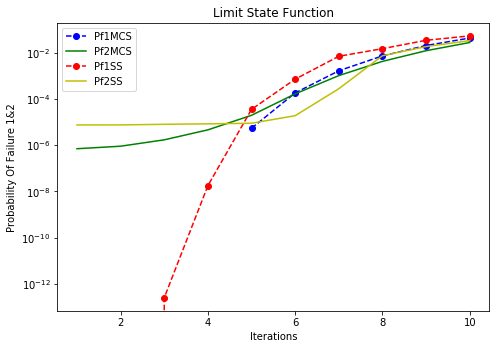

In [9]:
axes1=plt.figure().add_axes([0,0,1,1])
axes1.set_yscale('log')
xaxis=[1,2,3,4,5,6,7,8,9,10]
xaxiss=[5,6,7,8,9,10]
axes1.plot(xaxiss,pf1m,'bo--',label="Pf1MCS")
axes1.plot(xaxis,pf2m,'g',label="Pf2MCS")
axes1.plot(xaxis,pf1,'ro--',label="Pf1SS")
axes1.plot(xaxis,pf2,'y',label="Pf2SS")
axes1.set_xlabel("Iterations")
axes1.set_ylabel("Probability Of Failure 1&2")
axes1.set_title('Limit State Function')
axes1.legend()

Example No 2

In [18]:

pf1m=[0,0,0,5.00000000000000e-07,7.54000000000000e-05,0.00128450000000000,0.00740190000000000,0.0234870000000000,0.0519889000000000,0.0920584000000000]
pf2m=[0,0,0,3.00000000000000e-07,1.92000000000000e-05,0.000358300000000000,0.00262250000000000,0.0102644000000000,0.0268894000000000,0.0544708000000000]

In [19]:
pfam=np.transpose(np.array([pf1m,pf2m]))
pfm=pd.DataFrame(pfam,columns=["pf1","pf2"])
print("pf:\n",pfm)

pf:
             pf1           pf2
0  0.000000e+00  0.000000e+00
1  0.000000e+00  0.000000e+00
2  0.000000e+00  0.000000e+00
3  5.000000e-07  3.000000e-07
4  7.540000e-05  1.920000e-05
5  1.284500e-03  3.583000e-04
6  7.401900e-03  2.622500e-03
7  2.348700e-02  1.026440e-02
8  5.198890e-02  2.688940e-02
9  9.205840e-02  5.447080e-02


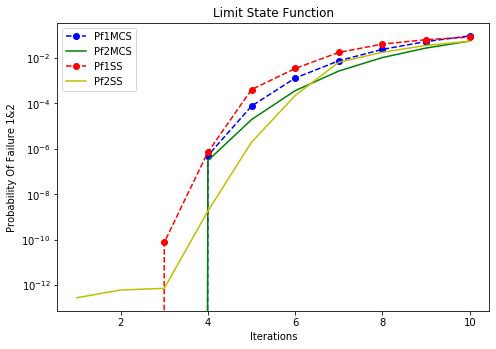

In [20]:
axes1=plt.figure().add_axes([0,0,1,1])
axes1.set_yscale('log')
xaxis=[1,2,3,4,5,6,7,8,9,10]
axes1.plot(xaxis,pf1m,'bo--',label="Pf1MCS")
axes1.plot(xaxis,pf2m,'g',label="Pf2MCS")
axes1.plot(xaxis,pf1,'ro--',label="Pf1SS")
axes1.plot(xaxis,pf2,'y',label="Pf2SS")
axes1.set_xlabel("Iterations")
axes1.set_ylabel("Probability Of Failure 1&2")
axes1.set_title('Limit State Function')
axes1.legend()

Example No 3

In [27]:
pf1m=[0,0,0,0,3.00000000000000e-07,2.35000000000000e-05,0.000338200000000000,0.00208100000000000,0.00749900000000000,0.0190242000000000]
pf2m=[0,0,0,0,3.00000000000000e-07,6.40000000000000e-06,0.000110100000000000,0.000752900000000000,0.00316000000000000,0.00919670000000000]

In [28]:
pfam=np.transpose(np.array([pf1m,pf2m]))
pfm=pd.DataFrame(pfam,columns=["pf1","pf2"])
print("pf:\n",pfm)

pf:
             pf1           pf2
0  0.000000e+00  0.000000e+00
1  0.000000e+00  0.000000e+00
2  0.000000e+00  0.000000e+00
3  0.000000e+00  0.000000e+00
4  3.000000e-07  3.000000e-07
5  2.350000e-05  6.400000e-06
6  3.382000e-04  1.101000e-04
7  2.081000e-03  7.529000e-04
8  7.499000e-03  3.160000e-03
9  1.902420e-02  9.196700e-03


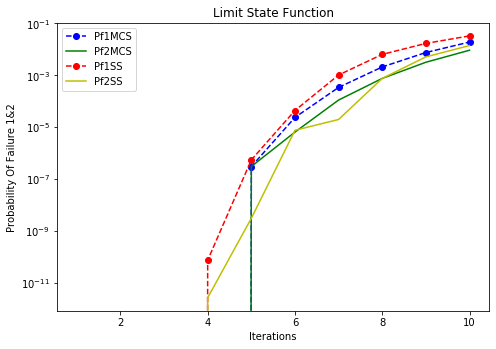

In [30]:
axes1=plt.figure().add_axes([0,0,1,1])
axes1.set_yscale('log')
xaxis=[1,2,3,4,5,6,7,8,9,10]
axes1.plot(xaxis,pf1m,'bo--',label="Pf1MCS")
axes1.plot(xaxis,pf2m,'g',label="Pf2MCS")
axes1.plot(xaxis,pf1,'ro--',label="Pf1SS")
axes1.plot(xaxis,pf2,'y',label="Pf2SS")
axes1.set_xlabel("Iterations")
axes1.set_ylabel("Probability Of Failure 1&2")
axes1.set_title('Limit State Function')
axes1.legend()

Example No 4

In [36]:
pf1m=[0,0,0,0,5.00000000000000e-07,5.14000000000000e-05,0.000633100000000000,0.00341750000000000,0.0111327000000000,0.0262758000000000]
pfm1=[0,0,0,0,1.00000000000000e-07,4.30000000000000e-06,9.78000000000000e-05,0.000744100000000000,0.00321700000000000,0.00951630000000000]

In [37]:
pfam=np.transpose(np.array([pf1m,pf2m]))
pfm=pd.DataFrame(pfam,columns=["pf1","pf2"])
print("pf:\n",pfm)

pf:
             pf1           pf2
0  0.000000e+00  0.000000e+00
1  0.000000e+00  0.000000e+00
2  0.000000e+00  0.000000e+00
3  0.000000e+00  0.000000e+00
4  5.000000e-07  3.000000e-07
5  5.140000e-05  6.400000e-06
6  6.331000e-04  1.101000e-04
7  3.417500e-03  7.529000e-04
8  1.113270e-02  3.160000e-03
9  2.627580e-02  9.196700e-03


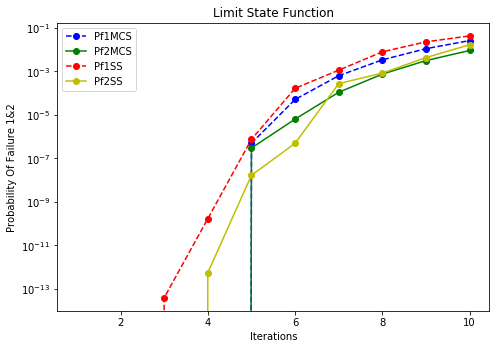

In [39]:
axes1=plt.figure().add_axes([0,0,1,1])
axes1.set_yscale('log')
xaxis=[1,2,3,4,5,6,7,8,9,10]
axes1.plot(xaxis,pf1m,'bo--',label="Pf1MCS")
axes1.plot(xaxis,pf2m,'go-',label="Pf2MCS")
axes1.plot(xaxis,pf1,'ro--',label="Pf1SS")
axes1.plot(xaxis,pf2,'yo-',label="Pf2SS")
axes1.set_xlabel("Iterations")
axes1.set_ylabel("Probability Of Failure 1&2")
axes1.set_title('Limit State Function')
axes1.legend()